In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, os.path
import numpy as np

path = os.getcwd() 

df = pd.read_csv(path + '/data for armankade.csv', sep='\t')
df.head()

,line,text,average tag
0,1,با تشکر از شما آقای عباسی,POSITIVE
1,2,برنامه خندوانه به زندگی ما انرژی داده مرسی,POSITIVE
2,3,مواظب کلیدت باش تو برفا گم نشه ،شب خونه راهت ن...,NEGATIVE
3,4,مایه افتخار ما شیرازی هاست که آقا اومدن اونجا ...,POSITIVE
4,5,@_zahra_str_75 بیخیار سالاد نمیشه,NATURAL


In [2]:
import emoji
import regex
import re
from hazm import Normalizer
from hazm import stopwords_list

normalizer = Normalizer()
punctuation_signs = list("?:!.,;")

def clean_text(text,normalizer=normalizer):
    text=  emoji.demojize(text)
    text= re.sub(r'(:[!_\-\w]+:)', '', text)
    text= re.sub(r'@\w+', ' ', text)
    text =  text.replace("#", " ")
    text =  text.replace("-", " ")
    text =  text.replace("_", " ")
    
    for i in punctuation_signs:
         text = text.replace(i,'')
    return text

def split_text(sentence):
    tokens = sentence.strip().split(' ')
    filtered_tokens = []
    for i in tokens:
        if(i not in stopwords_list()):
            filtered_tokens.append(i)
    return filtered_tokens

def demojize(liiist):
    
    z = []
    for item in liiist:
        z.append(emoji.demojize(item))
    return z

df['emoji'] = df['text'].apply(lambda x : emoji.distinct_emoji_list(x))
#df['sentence_tokens'] = df['text'].apply(lambda x : x.strip().split(' '))
df['text'] = df['text'].apply(lambda x : clean_text(x))
df['text_split'] = df['text'].apply(lambda x :split_text(x))
#df['text'] = df['text'].replace('\d+', '')
df['emoji'] = df['emoji'].apply(lambda x : demojize(x))


In [3]:
df['context'] = df['text_split']+df['emoji']
df['context'] = df['context'].apply(lambda x: " ".join(x))
df.head()

,line,text,average tag,emoji,text_split,context
0,1,با تشکر از شما آقای عباسی,POSITIVE,[],"[تشکر, عباسی]",تشکر عباسی
1,2,برنامه خندوانه به زندگی ما انرژی داده مرسی,POSITIVE,[],"[برنامه, خندوانه, زندگی, انرژی, مرسی]",برنامه خندوانه زندگی انرژی مرسی
2,3,مواظب کلیدت باش تو برفا گم نشه ،شب خونه راهت ن...,NEGATIVE,[],"[مواظب, کلیدت, باش, برفا, گم, نشه, ،شب, خونه, ...",مواظب کلیدت باش برفا گم نشه ،شب خونه راهت نمیدن
3,4,مایه افتخار ما شیرازی هاست که آقا اومدن اونجا ...,POSITIVE,"[:tulip:, :cherry_blossom:, :blossom:]","[مایه, افتخار, شیرازی, هاست, آقا, اومدن, اونجا...",مایه افتخار شیرازی هاست آقا اومدن اونجا قربون...
4,5,بیخیار سالاد نمیشه,NATURAL,[],"[بیخیار, سالاد, نمیشه]",بیخیار سالاد نمیشه


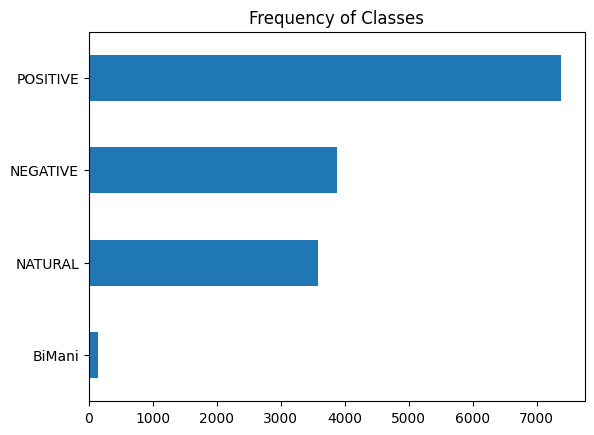

In [4]:
import matplotlib.pyplot as plt
df["average tag"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [5]:
BiMani_split_text_lists = list(df[df['average tag'] == 'BiMani']['text_split'])
BiMani_split_emoji_lists = list(df[df['average tag'] == 'BiMani']['emoji'])


def flatten(l):
    return [item for sublist in l for item in sublist]

BiMani_split_text_list = flatten(BiMani_split_text_lists)
BiMani_split_emoji_list = flatten(BiMani_split_emoji_lists)

In [6]:
import random 
import pandas as pd

len_Natural_class = df["average tag"].value_counts()['NATURAL']
len_BiMani_class = df["average tag"].value_counts()['BiMani']
mean_sentence_len = int(df["text_split"].str.len().mean())
mean_emoji_len = 2

len_BiMani_split_text_list = len(BiMani_split_text_list)
len_BiMani_split_emoji_list = len(BiMani_split_emoji_list)

line_num = len(df)+1

lines = []
texts = []
average_tags = []
emojis = []
text_splits = []
contexts = []

for counter in range(len_Natural_class-len_BiMani_class):
     token_num = random.randint(1, mean_sentence_len)
     emoji_num = random.randint(0,mean_emoji_len)
     text_split_list = []
     emoji_list = []
     
     if( random.randint(0,1) == 1):
         for i in range(emoji_num):
                emoji_indx = random.randint(0,len_BiMani_split_emoji_list-1)
                emoji_list.append(BiMani_split_emoji_list[emoji_indx])

     for i in range(token_num):
            token_indx = random.randint(0,len_BiMani_split_text_list-1)
            text_split_list.append(BiMani_split_text_list[token_indx])
            
     
     lines.append(line_num)
     texts.append(' '.join(text_split_list))
     average_tags.append('BiMani')
     emojis.append(emoji_list)
     text_splits.append(text_split_list)
     contexts.append(' '.join(text_split_list+emoji_list))
     line_num += 1
        
dict_df = {'line':lines ,
                'text': texts,
                'average tag':average_tags ,
                'emoji' :emojis,
                'text_split':text_splits ,
                'context': contexts
                }

df2 = pd.DataFrame.from_dict(dict_df, orient='index')
df2 = df2.transpose()

df = pd.concat([df,df2],ignore_index=True)

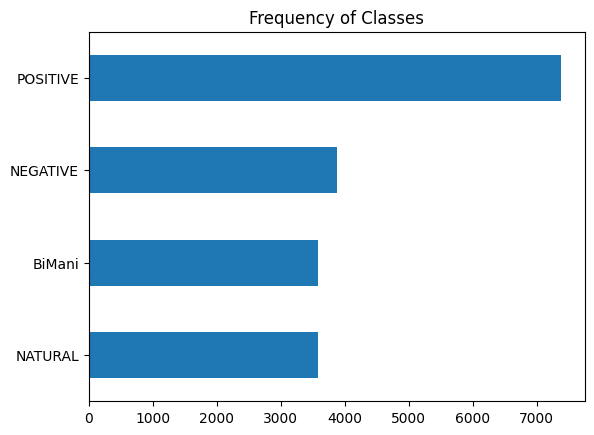

In [7]:
df["average tag"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [19]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

label_dict = {'POSITIVE':0, 'NEGATIVE':1, 'NATURAL':2, 'BiMani':3}
df['target'] = df['average tag'].apply(lambda x: label_dict[x])

y = df['target'].values
encoder = LabelBinarizer()
y_oh = encoder.fit_transform(y)
X = df['context']
X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size=0.2, random_state=0, stratify=y)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

X_train = tfidf.fit_transform(X_train).toarray()

In [20]:
learning_rate = 0.1
n_iter = 500
ws,bs = [],[]

predict = lambda x, w, b: np.matmul(w,x.T) + b
sigmoid = lambda yhat: 1/(1+np.exp(-yhat))
loss = lambda y, sig: -(y*np.log(sig)+(1-y)*np.log(1-sig)).mean()
dldw = lambda x, y, sig: (np.reshape(sig-y,(x.shape[0],1))*x).mean(axis = 0)
dldb = lambda y, sig: (sig-y).mean(axis = 0)
update = lambda w, grad, lr: w-(grad*lr)

In [21]:
for c in range(4):
    b = 0
    w = np.zeros(X_train.shape[1])
    for i in range(n_iter):
        yhat = predict(X_train,w,b)
        sig = sigmoid(yhat)
        grad_w = dldw(X_train,y_train[:,c],sig)
        grad_b = dldb(y_train[:,c],sig)
        w = update(w,grad_w,learning_rate)
        b = update(b,grad_b,learning_rate)
    ws.append(w)
    bs.append(b)

In [22]:
sigs = []
for c in range(4):
    yhat = predict(X_test,ws[c],bs[c])
    sig = sigmoid(yhat)
    sigs.append(sig)
y_pred = np.argmax(sigs,axis = 0)

In [28]:
print(f'Acuuracy is : {(sum(y_pred == np.argmax(y_test, axis=1))/len(y_test))*100} %')

Acuuracy is : 40.03795066413662 %


In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_dict = {'POSITIVE':0, 'NEGATIVE':1, 'NATURAL':2, 'BiMani':3}
df['target'] = df['average tag'].apply(lambda x: label_dict[x])

y = df['target'].values
encoder = LabelEncoder()
y_oh = encoder.fit_transform(y)
X = df['context']
X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size=0.2, random_state=0, stratify=y)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

X_train = tfidf.fit_transform(X_train).toarray()

In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)


/home/zohre/Projects/MCI/Logestic Regression/LR/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
X_test = tfidf.transform(X_test).toarray()
predict = clf.predict(X_test)

In [37]:
print(f'Accuracy is {(np.sum(predict == y_test)/len(y_test)) * 100} %')


Accuracy is 72.35023041474655 %


In [38]:
pickle.dump(tfidf,open("tfidf.pkl","wb"))
pickle.dump(clf,open("LR_model.joblib","wb"))
